1. Load breast cancer dataset (**structured data**)

For more details about the data: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html

In [ ]:
#https://github.com/natany191/Natan_Yehezkel_ex1
from sklearn.datasets import load_breast_cancer

my_data = load_breast_cancer()


2. Visualize the data

- Only **5 points** for visualizing the data
- Use TSNE algorithm: sklearn.manifold.TSNE
- A good and simple code can be found here (they used PCA instead of TSNE): https://skp2707.medium.com/pca-on-cancer-dataset-4d7a97f5fdb8

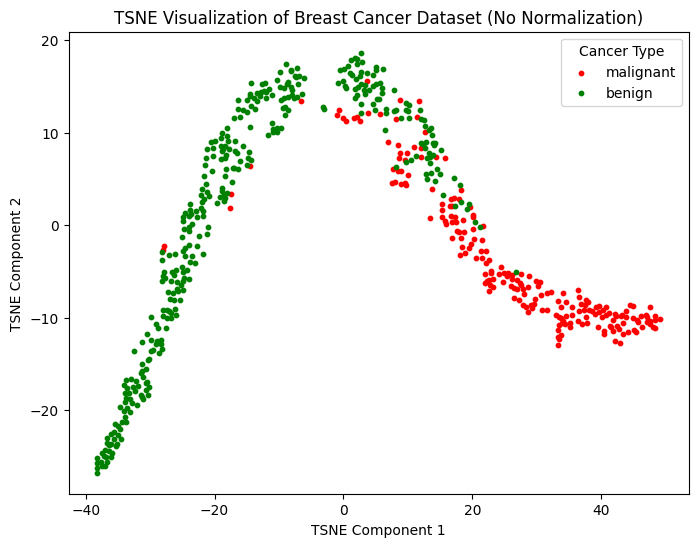

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
X = my_data.data
y = my_data.target

tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)
plt.figure(figsize=(8, 6))

for label, color, name in zip([0, 1], ['red', 'green'], my_data.target_names):
    plt.scatter(
        X_embedded[y == label, 0], X_embedded[y == label, 1],
        c=color, label=name, s=10)

plt.legend(title="Cancer Type")
plt.title("TSNE Visualization of Breast Cancer Dataset (No Normalization)")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.show()



3. Split **my_data** to train and test:

- Define X_train, X_test, Y_train, Y_test
- Choose **test_size** for splitting **my_data**
- Use **train_test_split** (for details: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
from sklearn.model_selection import train_test_split
X = my_data.data
y = my_data.target
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)




4. Train **model_decision_tree**

- Library: sklearn.tree.DecisionTreeClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize DecisionTreeClassifier options   

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=30, min_samples_leaf=9 , min_samples_split= 2)
decision_tree.fit(X_train, Y_train)




DecisionTreeClassifier(max_depth=30, min_samples_leaf=9)

5. Train model_random_forest
- Library: sklearn.ensemble.RandomForestClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize RandomForestClassifier options

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_random_forest = RandomForestClassifier(warm_start=True,max_leaf_nodes=102)
model_random_forest.fit(X_train, Y_train)

RandomForestClassifier(max_leaf_nodes=102, warm_start=True)

6. Train model_adaboost

- Library: sklearn.ensemble.AdaBoostClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize AdaBoostClassifier options

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_adaboost = AdaBoostClassifier(learning_rate=0.4)
model_adaboost.fit(X_train, Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.4)

7. Evaluate model_decision_tree, model_random_forest, model_adaboost

- Library: sklearn.metrics
- Data: X_test, Y_test
- **Calculate** and **print** results of each classifier
- **Choose** the decisive metric
- **Compare** between the classifiers and declare the winner


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def evaluate_model(model, model_name, X_test, Y_test):
    accuracy = accuracy_score(Y_test, model.predict(X_test))
    precision = precision_score(Y_test, model.predict(X_test), average='binary')
    recall = recall_score(Y_test, model.predict(X_test), average='binary')
    f1 = f1_score(Y_test, model.predict(X_test), average='binary')
    confusion = confusion_matrix(Y_test, model.predict(X_test))

    print(f"\n=== {model_name} ===")
    print(f"F-Score: {f1}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"Accuracy: {accuracy}")
    print("Confusion Matrix:\n", confusion)
    return f1, accuracy, precision, recall, confusion

f1_decision_tree, accuracy_decision_tree, precision_decision_tree, recall_decision_tree, confusion_decision_tree = evaluate_model(decision_tree, "Decision Tree", X_test, Y_test)
f1_random_forest, accuracy_random_forest, precision_random_forest, recall_random_forest, confusion_random_forest = evaluate_model(model_random_forest, "Random Forest", X_test, Y_test)
f1_adaboost, accuracy_adaboost, precision_adaboost, recall_adaboost, confusion_adaboost = evaluate_model(model_adaboost, "AdaBoost", X_test, Y_test)
f1_scores = {"Decision Tree": f1_decision_tree, "Random Forest": f1_random_forest, "AdaBoost": f1_adaboost}
winner_model = max(f1_scores, key=f1_scores.get)
print(f"\nThe winning model is: {winner_model} with an FScore of {f1_scores[winner_model]}")




=== Decision Tree ===
F-Score: 0.9583333333333334
Recall: 0.971830985915493
Precision: 0.9452054794520548
Accuracy: 0.9473684210526315
Confusion Matrix:
 [[39  4]
 [ 2 69]]

=== Random Forest ===
F-Score: 0.9722222222222222
Recall: 0.9859154929577465
Precision: 0.958904109589041
Accuracy: 0.9649122807017544
Confusion Matrix:
 [[40  3]
 [ 1 70]]

=== AdaBoost ===
F-Score: 0.9722222222222222
Recall: 0.9859154929577465
Precision: 0.958904109589041
Accuracy: 0.9649122807017544
Confusion Matrix:
 [[40  3]
 [ 1 70]]

The winning model is: Random Forest with an FScore of 0.9722222222222222
